# Tests For the WaterDetect
This notebook brings examples to test all the basic functionalities of the `waterdetect` package:
- script to run from command prompt
- clip to an area of interest (specific shapefile)
- run as a import package in Batch Mode and Single Mode
- run without GDAL
- types of data tested (S2_THEIA, S2_S2COR, S2_L1C)

It will test the entry-points. The paths are pointing to local structure. Please ajust them to your data.

Basic paths:

In [8]:
input_folder='D:/Images/Input/Input_Tiete' # repository of MAJA/THEIA images
output_folder='D:/Images/Output'
shape_file='D:/Shp/Area_Tiete.shp'

s2cor_image='D:/Images/Download/France-L2A/S2A_MSIL2A_20180819T105031_N0208_R051_T31TCM_20180819T145346.SAFE'
l1c_image='D:/Images/Download/France-L1C/S2A_MSIL1C_20180819T105031_N0206_R051_T31TCM_20180819T130740.SAFE'

## Run as Script
When installed, the `waterdetect` creates a entry point called waterdetect in the path, that can be used to call the main function and to get the basic .ini file. We will run shell commands from here. 

In [6]:
!waterdetect -h

usage: waterdetect [-h] [-GC] [-i INPUT] [-o OUT] [-s SHP] [-p PRODUCT]
                   [-c CONFIG]

The waterdetect is a high speed water detection algorithm for satellite
images. It will loop through all images available in the input folder and
write results for every combination specified in the .ini file to the output
folder. It can also run for single images from Python console or Jupyter
notebook. Refer to the onlinedocumentation

optional arguments:
  -h, --help            show this help message and exit
  -GC, --GetConfig      Copy the WaterDetect.ini from the package into the
                        current directory and skips the processing. Once
                        copied you can edit the .ini file and launch the
                        waterdetect without -c option.
  -i INPUT, --input INPUT
                        The products input folder. Required.
  -o OUT, --out OUT     Output directory. Required.
  -s SHP, --shp SHP     SHP file. Optional.
  -p PRODUCT, --produ

In [7]:
!waterdetect -GC

Copying d:\programs\anaconda\envs\fastai2_v3\lib\site-packages\waterdetect\WaterDetect.ini into current dir.
WaterDetect.ini copied into D:\Projects\Scratch.


In [10]:
# launching the basic processing
!waterdetect -i {input_folder} -o {output_folder} -s {shape_file}

0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 505, 318
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 505, 318
0...10...20...30...40...50...60...70...80...90...100 - done.
Loading configuration file WaterDetect.ini
File WaterDetect.ini verified.
Folder D:/Images/Input/Input_Tiete verified.
File D:/Shp/Area_Tiete.shp verified.
Folder D:/Images/Output verified.
Opening image in folder D:\Images\Input\Input_Tiete\SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0
Retrieving bands for product S2_THEIA
10 were found:
Loading band: Blue
Loading band: Green
Loading band: Red
Loading band: Mir
Loading band: Mir2
Loading band: Nir
Loading band: Nir2
Loading band: RedEdg1
Loading band: RedEdg2
Loading band: RedEdg3
Saving image: D:/Images/Output/Area_Tiete/SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0/SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0_invalid_mask.tif
Calculating clusters for the following combination of bands:
['

## As a component: Batch Mode
The method to be called to run waterdetect in batch mode is `DWWaterDetect.run_batch()`

In [15]:
%load_ext autoreload
%autoreload 2
import waterdetect as wd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To run in batch mode:

In [12]:
wd.DWWaterDetect.run_batch(input_folder=input_folder,
                           output_folder=output_folder,
                           shape_file=shape_file,
                          )

Loading configuration file WaterDetect.ini
File WaterDetect.ini verified.
Folder D:/Images/Input/Input_Tiete verified.
File D:/Shp/Area_Tiete.shp verified.
Folder D:/Images/Output verified.
Opening image in folder D:\Images\Input\Input_Tiete\SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0
Retrieving bands for product S2_THEIA
10 were found:
Loading band: Blue
Loading band: Green
Loading band: Red
Loading band: Mir
Loading band: Mir2
Loading band: Nir
Loading band: Nir2
Loading band: RedEdg1
Loading band: RedEdg2
Loading band: RedEdg3
Saving image: D:/Images/Output/Area_Tiete/SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0/SENTINEL2A_20190326-132829-354_L2A_T22KGA_C_V2-0_invalid_mask.tif
Calculating clusters for the following combination of bands:
['mndwi', 'ndwi', 'Mir2']
Selection of best number of clusters using Calinski-Harabasz Index:
k=2 :Calinski_harabaz index=180318.70454147863
k=3 :Calinski_harabaz index=90874.40576534568
k=4 :Calinski_harabaz index=61195.230558767435
k=5 :Ca

## As component: Single Mode (Sen2Cor)
The execution of waterdetect in single mode is pretty similar. Two differences should be noted though:<br>
1- The image folder is the path of the specific image, not the parent folder;<br>
2- It executes just one mask (the first combination of bands listed in the config file) and returns a DWImageClustering object with the results in memory.

In [16]:
water_mask = wd.DWWaterDetect.run_single(image_folder=s2cor_image,
                                         output_folder=output_folder,
                                         product=wd.DWProducts.Sentinel2_ESA
                                        )

Loading configuration file WaterDetect.ini
File WaterDetect.ini verified.
Folder D:/Images/Download/France-L2A/S2A_MSIL2A_20180819T105031_N0208_R051_T31TCM_20180819T145346.SAFE verified.
Folder D:/Images/Output verified.
Opening image in folder D:\Images\Download\France-L2A\S2A_MSIL2A_20180819T105031_N0208_R051_T31TCM_20180819T145346.SAFE
Retrieving bands for product S2_S2COR
35 were found:
Loading band: Blue
Loading band: Green
Loading band: Red
Loading band: Mir
Loading band: Mir2
Loading band: RedEdg1
Loading band: RedEdg2
Loading band: RedEdg3
Loading band: Nir
Loading band: Nir2
Saving image: D:/Images/Output/S2A_MSIL2A_20180819T105031_N0208_R051_T31TCM_20180819T145346/S2A_MSIL2A_20180819T105031_N0208_R051_T31TCM_20180819T145346_invalid_mask.tif
Calculating water mask in single mode. Just the first band_combination is processed
Calculating clusters for the following combination of bands:
['mndwi', 'ndwi', 'Mir2']
Selection of best number of clusters using Calinski-Harabasz Index:


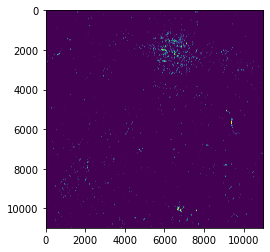

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(water_mask.water_mask==1)

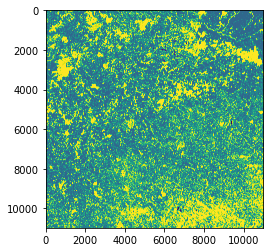

In [18]:
plt.imshow(water_mask.cluster_matrix)

## As component: Single Mode (L1C)

In [19]:
water_mask = wd.DWWaterDetect.run_single(image_folder=l1c_image,
                                         output_folder=output_folder,
                                         product=wd.DWProducts.Sentinel2_L1C
                                        )

Loading configuration file WaterDetect.ini
File WaterDetect.ini verified.
Folder D:/Images/Download/France-L1C/S2A_MSIL1C_20180819T105031_N0206_R051_T31TCM_20180819T130740.SAFE verified.
Folder D:/Images/Output verified.
Opening image in folder D:\Images\Download\France-L1C\S2A_MSIL1C_20180819T105031_N0206_R051_T31TCM_20180819T130740.SAFE
Retrieving bands for product S2_L1C
14 were found:
Loading band: Blue
Loading band: Green
Loading band: Red
Loading band: Mir
Loading band: Mir2
Loading band: Nir
Loading band: Nir2
Loading band: RedEdg1
Loading band: RedEdg2
Loading band: RedEdg3
Saving image: D:/Images/Output/S2A_MSIL1C_20180819T105031_N0206_R051_T31TCM_20180819T130740/S2A_MSIL1C_20180819T105031_N0206_R051_T31TCM_20180819T130740_invalid_mask.tif
Calculating water mask in single mode. Just the first band_combination is processed
Calculating clusters for the following combination of bands:
['mndwi', 'ndwi', 'Mir2']
Selection of best number of clusters using Calinski-Harabasz Index:
k=